#### Observations
- 277396 unique ips in train, 93936 unique ips in test
- 59.3% of new ip are present in test
- 88.33% of train ips downloaded app atleast once

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc

/Users/abk0005/Competitions/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/abk0005/Competitions/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
## declare global variables
path = "../input"
column_dtypes = {"ip": 'uint32'
                ,"app" : 'uint16'
                ,"device": 'uint16'
                ,"os": 'uint16'
                ,"channel": 'uint32'
                ,"is_attributed": 'uint8'}

In [4]:
train = pd.read_csv(os.path.join(path, "train.csv"), dtype=column_dtypes)
train.click_time = pd.to_datetime(train.click_time)
train.attributed_time = pd.to_datetime(train.attributed_time)
train.info()
print(train.describe(include = "all"))

test = pd.read_csv(os.path.join(path, "test.csv"), dtype = column_dtypes)
test.click_time = pd.to_datetime(test.click_time)
test.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 8 columns):
ip                 int32
app                int16
device             int16
os                 int16
channel            int32
click_time         datetime64[ns]
attributed_time    datetime64[ns]
is_attributed      int8
dtypes: datetime64[ns](2), int16(3), int32(2), int8(1)
memory usage: 5.3 GB
                  ip           app        device            os       channel  \
count   1.849039e+08  1.849039e+08  1.849039e+08  1.849039e+08  1.849039e+08   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean    9.087604e+04  1.201131e

,click_id,ip,app,device,os,channel,click_time
count,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,18790469
unique,NaN,NaN,NaN,NaN,NaN,NaN,21603
top,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 09:00:10
freq,NaN,NaN,NaN,NaN,NaN,NaN,1466
first,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 04:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 15:00:00
mean,9.395234e+06,6.306921e+04,1.221480e+01,1.730513e+00,1.873312e+01,2.648059e+02,NaN
std,5.424341e+06,3.688597e+04,1.164924e+01,2.597038e+01,1.135059e+01,1.355254e+02,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,4.697617e+06,3.155800e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.350000e+02,NaN


In [5]:
gc.collect()

80

In [59]:
## comparing test and train data sets
feats = ["ip", "app", "device", "os", "channel"]
summary_df = pd.DataFrame(index= feats, columns=["unique_elements_in_train", "unique_elements_in_test",
                                                "New_elements_in_test"])
for f in feats:
    summary_df.loc[f, "unique_elements_in_train"] = train[f].nunique()
    summary_df.loc[f, "unique_elements_in_test"] = test[f].nunique()
    summary_df.loc[f, "New_elements_in_test"] = len(set(test[f]) - set(train[f]))

In [60]:
summary_df["percentage_of_test"] = summary_df["New_elements_in_test"]*100/summary_df["unique_elements_in_test"]
summary_df

,unique_elements_in_train,unique_elements_in_test,New_elements_in_test,percentage_of_test
ip,277396,93936,55772,59.372339
app,706,417,24,5.755396
device,3475,1985,324,16.322418
os,800,395,56,14.177215
channel,202,178,0,0.000000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 8 columns):
ip                 int32
app                int16
device             int16
os                 int16
channel            int32
click_time         datetime64[ns]
attributed_time    datetime64[ns]
is_attributed      int8
dtypes: datetime64[ns](2), int16(3), int32(2), int8(1)
memory usage: 5.3 GB


In [64]:
train["click_year"] = pd.DatetimeIndex(train["click_time"]).year
train["click_month"] = pd.DatetimeIndex(train["click_time"]).month
train["click_day"] = pd.DatetimeIndex(train["click_time"]).day
train["click_hour"] = pd.DatetimeIndex(train["click_time"]).hour
train["click_minute"] = pd.DatetimeIndex(train["click_time"]).minute

In [31]:
click_columns = [c for c in train.columns.values if "click_" in c and c != "click_time"]
for c in click_columns:
    temp = train[[c, "is_attributed"]].groupby(c).mean().reset_index()
    print(temp)

   click_year  is_attributed
0        2017       0.002471
   click_month  is_attributed
0           11       0.002471
   click_day  is_attributed
0          6       0.001869
1          7       0.002552
2          8       0.002436
3          9       0.002527
    click_hour  is_attributed
0            0       0.002083
1            1       0.002945
2            2       0.003016
3            3       0.002962
4            4       0.002605
5            5       0.002637
6            6       0.002719
7            7       0.002769
8            8       0.002950
9            9       0.002742
10          10       0.002444
11          11       0.002628
12          12       0.002689
13          13       0.002502
14          14       0.002100
15          15       0.001430
16          16       0.001709
17          17       0.001773
18          18       0.001938
19          19       0.002111
20          20       0.002328
21          21       0.002467
22          22       0.002123
23          23       0

### attributed columns to be looked after
- can be used to segment **ip**

In [33]:
## attributed columns to be looked after
train["attributed_year"] = pd.DatetimeIndex(train["attributed_time"]).year
train["attributed_month"] = pd.DatetimeIndex(train["attributed_time"]).month
train["attributed_day"] = pd.DatetimeIndex(train["attributed_time"]).day
train["attributed_hour"] = pd.DatetimeIndex(train["attributed_time"]).hour
train["attributed_minute"] = pd.DatetimeIndex(train["attributed_time"]).minute

click_columns = [c for c in train.columns.values if "attributed_" in c and c != "attributed_time"]
for c in click_columns:
    temp = train[[c, "is_attributed"]].groupby(c).count().reset_index()
    print(temp)

   attributed_year  is_attributed
0           2017.0         456846
   attributed_month  is_attributed
0              11.0         456846
   attributed_day  is_attributed
0             6.0          10717
1             7.0         152417
2             8.0         151761
3             9.0         141951
    attributed_hour  is_attributed
0               0.0          12718
1               1.0          20548
2               2.0          23921
3               3.0          25131
4               4.0          26286
5               5.0          26279
6               6.0          26946
7               7.0          27610
8               8.0          28930
9               9.0          28117
10             10.0          26843
11             11.0          29457
12             12.0          32064
13             13.0          33496
14             14.0          31605
15             15.0          23675
16             16.0           5851
17             17.0           4191
18             18.0           28

In [17]:
del train, test
gc.collect()

333308

In [3]:
# ## Sparse df to sparse matrix
# def sparse_df_to_csr(df):
#     return sparse.csr_matrix(df.to_coo())

In [15]:
# def load_column(column_name, column_index):
#     train = pd.read_csv(os.path.join(path, "train.csv"), usecols = [column_index], dtype = 'uint32')
#     test = pd.read_csv(os.path.join(path, "test.csv"), usecols = [column_index + 1], dtype = 'uint32')
    
#     sparse_df = pd.get_dummies(np.hstack([train[column_name].values, test[column_name].values]), sparse = True)
    
#     train_sparse_df = sparse_df.loc[:train.shape[0]]
#     test_sparse_df = sparse_df.loc[train.shape[0]:]
    
#     train_sparse_mat = sparse_df_to_csr(train_sparse_df)
#     test_sparse_mat = sparse_df_to_csr(test_sparse_df)

#     return train_sparse_mat, test_sparse_mat

In [2]:
# from sklearn.preprocessing import OneHotEncoder

In [ ]:
#train_ip_sparse_mat, test_ip_sparse_mat = load_column("ip", 0)
# train_app_sparse_mat, test_app_sparse_mat = load_column("app", 1)
# train_device_sparse_mat, test_device_sparse_mat = load_column("device", 2)
# train_os_sparse_mat, test_os_sparse_mat = load_column("os", 3)
# train_channel_sparse_mat, test_channel_sparse_mat = load_column("channel", 4)

In [58]:
train = pd.read_csv(os.path.join(path, "train.csv"), dtype= column_dtypes)
test = pd.read_csv(os.path.join(path, "test.csv"), dtype = column_dtypes)

In [39]:
temp = train[["ip", "is_attributed"]].groupby("ip").agg({"is_attributed": ["mean", "sum"]}).reset_index()
temp.columns = ['_'.join(col) for col in temp.columns]
temp.head()

,ip_,is_attributed_mean,is_attributed_sum
0,1,0.191489,9.0
1,5,0.000000,0.0
2,6,0.001376,2.0
3,9,0.001489,6.0
4,10,0.002542,3.0


In [41]:
temp = temp.sort_values(by = "is_attributed_sum", ascending = False)
temp.head()

,ip_,is_attributed_mean,is_attributed_sum
1654,5348,0.001889,2340.0
1642,5314,0.001878,2200.0
22709,73487,0.001428,1091.0
22718,73516,0.001330,1025.0
1597,5178,0.002061,436.0


In [56]:
del temp
gc.collect()

6677475

In [46]:
ip_with_positive_click = temp[temp.is_attributed_mean > 0]

In [54]:
ip_with_positive_click.shape[0]/train_ip.ip.nunique()

0.8833508774459617

In [47]:
import matplotlib.pyplot as plt

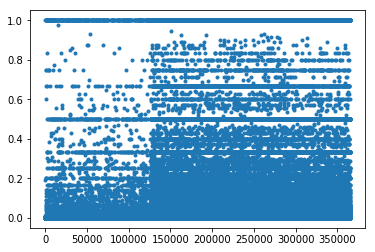

In [52]:
plt.figure()
plt.plot(temp.ip_, temp.is_attributed_mean, '.')
plt.show()

In [61]:
train.click_time = pd.to_datetime(train.click_time)
test.click_time = pd.to_datetime(test.click_time)

In [65]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_year,click_month,click_day,click_hour,click_minute
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,2017,11,6,14,32
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,2017,11,6,14,33
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,2017,11,6,14,34
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,2017,11,6,14,34
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,2017,11,6,14,35


In [66]:
train["click_day"].value_counts()

8    62945075
7    59633310
9    53016937
6     9308568
Name: click_day, dtype: int64

In [67]:
train_2 = train[train.click_day > 6]

In [69]:
train_2.ip.nunique()/277396

0.9857676390431008

In [70]:
## comparing test and train data sets
feats = ["ip", "app", "device", "os", "channel"]
summary_df = pd.DataFrame(index= feats, columns=["unique_elements_in_train", "unique_elements_in_test",
                                                "New_elements_in_test"])
for f in feats:
    summary_df.loc[f, "unique_elements_in_train"] = train_2[f].nunique()
    summary_df.loc[f, "unique_elements_in_test"] = test[f].nunique()
    summary_df.loc[f, "New_elements_in_test"] = len(set(test[f]) - set(train_2[f]))
    
summary_df["percentage_of_test"] = summary_df["New_elements_in_test"]*100/summary_df["unique_elements_in_test"]
summary_df

,unique_elements_in_train,unique_elements_in_test,New_elements_in_test,percentage_of_test
ip,273448,93936,55781,59.381920
app,699,417,25,5.995204
device,3427,1985,331,16.675063
os,773,395,58,14.683544
channel,202,178,0,0.000000


### I think we can safely remove the 6th Nov 2017 rows

#### Intraday comparision

In [77]:
train_7 = train[train.click_day == 7]

In [81]:
temp = train_7[["click_hour", "is_attributed"]].groupby("click_hour").mean().reset_index()

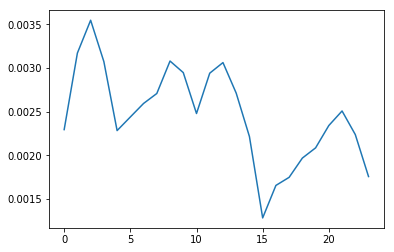

In [82]:
plt.figure()
plt.plot(temp.click_hour, temp.is_attributed)
plt.show()

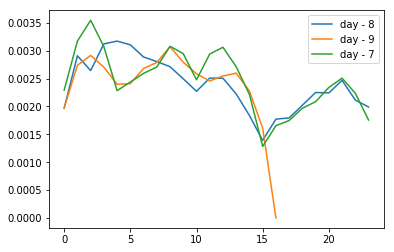

In [88]:
train_8 = train[train.click_day == 8]
temp = train_8[["click_hour", "is_attributed"]].groupby("click_hour").mean().reset_index()
temp1 = train_9[["click_hour", "is_attributed"]].groupby("click_hour").mean().reset_index()
temp2 = train_7[["click_hour", "is_attributed"]].groupby("click_hour").mean().reset_index()


plt.figure()
plt.plot(temp.click_hour, temp.is_attributed, label = "day - 8")
plt.plot(temp1.click_hour, temp1.is_attributed, label = "day - 9")
plt.plot(temp2.click_hour, temp2.is_attributed, label = "day - 7")
plt.legend()
plt.show()

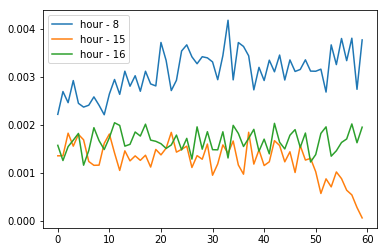

In [97]:
train_7_hour8 = train_7[train_7.click_hour == 8]
temp = train_7_hour8[["click_minute", "is_attributed"]].groupby("click_minute").mean().reset_index()

train_7_hour8 = train_7[train_7.click_hour == 12]
temp1 = train_7_hour8[["click_minute", "is_attributed"]].groupby("click_minute").mean().reset_index()

train_7_hour8 = train_7[train_7.click_hour == 3]
temp2 = train_7_hour8[["click_minute", "is_attributed"]].groupby("click_minute").mean().reset_index()

train_7_hour8 = train_7[train_7.click_hour == 15]
temp3 = train_7_hour8[["click_minute", "is_attributed"]].groupby("click_minute").mean().reset_index()

train_7_hour8 = train_7[train_7.click_hour == 16]
temp4 = train_7_hour8[["click_minute", "is_attributed"]].groupby("click_minute").mean().reset_index()

plt.figure()
plt.plot(temp.click_minute, temp.is_attributed, label ="hour - 8")
#plt.plot(temp1.click_minute, temp1.is_attributed, label ="hour - 12")
#plt.plot(temp2.click_minute, temp2.is_attributed, label ="hour - 3")
plt.plot(temp3.click_minute, temp3.is_attributed, label ="hour - 15")
plt.plot(temp4.click_minute, temp4.is_attributed, label ="hour - 16")
plt.legend()
plt.show()

In [100]:
def plot_attribute(df_data, filter_var, filter_value, group_var):
    temp = df_data[df_data[filter_var] == filter_value]
    
    temp = temp[[group_var, "is_attributed"]].groupby(group_var).mean().reset_index()
    
    return temp

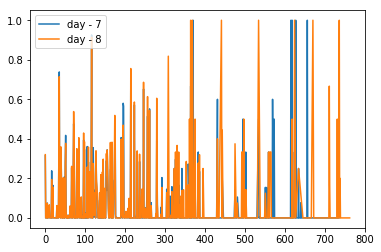

In [107]:
temp = plot_attribute(train, "click_day", 7, "app")
plt.figure()
plt.plot(temp["app"], temp["is_attributed"], label = "day - 7")

temp = plot_attribute(train, "click_day", 8, "app")
plt.plot(temp["app"], temp["is_attributed"], label = "day - 8")

# temp = plot_attribute(train, "click_day", 9, "app")
# plt.plot(temp["app"], temp["is_attributed"], label = "day - 9")

plt.legend()
plt.show()

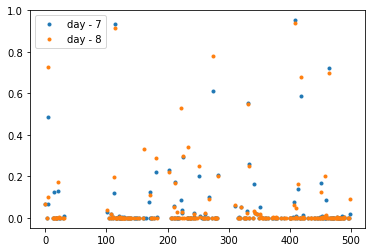

In [105]:
temp = plot_attribute(train, "click_day", 7, "channel")
plt.figure()
plt.plot(temp["channel"], temp["is_attributed"],'.' ,label = "day - 7")

temp = plot_attribute(train, "click_day", 8, "channel")
plt.plot(temp["channel"], temp["is_attributed"], '.',label = "day - 8")

# temp = plot_attribute(train, "click_day", 9, "app")
# plt.plot(temp["app"], temp["is_attributed"], label = "day - 9")

plt.legend()
plt.show()